In [25]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# 윈저사이저 적용
df = pd.read_csv('./dataset/sampling5000.csv', encoding='CP949')
# df.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'month'],axis=1,inplace=True)
# for col in df.columns:
#      df[col] = winsorize(df[col], limits= 0.01)

In [3]:
# 공통선정피쳐
[['[제조]순운전자본회전률','[제조]총자본증가율','[제조]자본분배율','[제조]매출액순이익률','[제조]부채비율','[제조]자기자본순이익률','[제조]비유동자산회전률']]

[['[제조]순운전자본회전률',
  '[제조]총자본증가율',
  '[제조]자본분배율',
  '[제조]매출액순이익률',
  '[제조]부채비율',
  '[제조]자기자본순이익률',
  '[제조]비유동자산회전률']]

In [27]:
# Data set1 공통 선정된 피처들 분리
df = df.sort_values(["year"],ascending=True)
df_data = df[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율',
       '[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율',
        '[제조]자본분배율']]
# df_data_scaled= StandardScaler().fit_transform(df_data)
# df_data_scaled= MinMaxScaler().fit_transform(df_data)
# df_data_scaled = pd.DataFrame(df_data_scaled)
# df_data_scaled.columns =[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
# '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율',
# '[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']] = df_data_scaled[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
df =df.reset_index(drop="index")
df.describe()

,[제조]총자본증가율,[제조]자기자본증가율,[제조]매출채권회전률,[제조]순운전자본비율,[제조]자기자본배율,[제조]비유동비율,[제조]유동자산구성비율,[제조]자기자본구성비율,[제조]자본분배율,year,label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.391182,8.917098,8.456154,13.516350,900.545336,117.186680,51.095910,53.429058,-2.480094,2015.508600,0.300000
std,34.766512,62.836861,9.622949,31.091393,1044.844495,107.017938,19.205945,24.426682,130.051477,2.985248,0.458303
min,-47.320000,-76.570000,0.930000,-46.370000,42.590000,7.430000,10.920000,8.930000,-710.100000,2011.000000,0.000000
25%,-11.902500,-13.745000,3.770000,-6.900000,166.080000,51.290000,37.337500,36.220000,0.000000,2013.000000,0.000000
50%,2.955000,3.850000,5.720000,14.610000,580.605000,84.595000,51.375000,54.460000,27.220000,2016.000000,0.000000
75%,16.050000,17.102500,9.270000,35.580000,1225.417500,139.825000,64.782500,73.000000,48.967500,2018.000000,1.000000
max,187.780000,333.240000,59.980000,81.090000,6407.620000,468.340000,92.890000,95.200000,85.040000,2020.000000,1.000000


In [29]:
# train test set 분리
df1 = df[df['year']<2019] #train
df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율',
       '[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율',
        '[제조]자본분배율']]
X_test = df2[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율',
       '[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율',
        '[제조]자본분배율']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]총자본증가율,[제조]자기자본증가율,[제조]매출채권회전률,[제조]순운전자본비율,[제조]자기자본배율,[제조]비유동비율,[제조]유동자산구성비율,[제조]자기자본구성비율,[제조]자본분배율
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,5.687738,14.757115,8.963114,17.010284,1011.629066,107.180357,52.613645,55.676969,-7.469579
std,35.678625,68.972060,8.650235,31.148713,1151.260936,94.713517,18.634661,23.745535,146.559695
min,-47.320000,-76.570000,0.930000,-46.370000,42.590000,7.430000,10.920000,8.930000,-710.100000
25%,-11.995000,-9.932500,4.142500,-2.300000,223.160000,49.270000,39.467500,39.910000,0.000000
50%,2.560000,2.835000,6.450000,18.800000,607.650000,79.050000,52.625000,56.410000,28.390000
75%,15.782500,17.102500,10.292500,41.170000,1419.367500,129.875000,65.442500,75.410000,48.910000
max,187.780000,333.240000,59.980000,81.090000,6407.620000,468.340000,92.890000,95.200000,85.040000


In [30]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [31]:
from sklearn.model_selection import GridSearchCV


In [32]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [13]:

tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 8, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.924


In [33]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#{'max_depth': 2, 'min_samples_leaf': 19}, 최적 평균 정확도 :0.983
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 8,min_samples_leaf=5)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [63]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [16]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8.10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(X_train,y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


KeyboardInterrupt: 

In [64]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 
# 'min_samples_split': 6, 'n_estimators': 60}, 최적 평균 정확도 :0.984
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=60)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [65]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.790


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [67]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.982
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [69]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    
    

1
0.8067765567765568
2
0.8067765567765568
3
0.8040293040293041
4
0.8040293040293041
5
0.8086080586080586
6
0.8086080586080586
7
0.8058608058608059
8
0.8058608058608059
9
0.8113553113553114
10
0.815018315018315


In [70]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [75]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율','[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율','[제조]자본분배율']]
X_train_XG.columns = [['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율','[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율','[제조]자본분배율']]
X_test_XG = df2[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율','[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율','[제조]자본분배율']]
X_test_XG.columns =[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출채권회전률',  '[제조]순운전자본비율','[제조]자기자본배율', '[제조]비유동비율', '[제조]유동자산구성비율', '[제조]자기자본구성비율','[제조]자본분배율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




ValueError: feature_names must be string, and may not contain [, ] or <

In [4]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[20,40,60,80,100],
          'learning_rate':[0.03,0.05,0.07,0.09],
          'max_depth' : [4,6,8,10]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train_XG,y_train_XG)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

NameError: name 'xgb_wrapper' is not defined

In [5]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}, 최적 평균 정확도:0.984
xgb_wrapper = XGBClassifier(learning_rate= 0.07, max_depth= 4, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

NameError: name 'XGBClassifier' is not defined

In [42]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]f
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [43]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(X_train, y_train)
    pc_pred = pc_clf.predict(X_test)
    
    pc_scores=accuracy_score(y_test, pc_pred)
    print(i)
    print(pc_scores)



1
0.23626373626373626
2
0.24358974358974358
3
0.23717948717948717
4
0.23809523809523808
5
0.23534798534798534
6
0.23992673992673993
7
0.24084249084249085
8
0.24725274725274726
9
0.2326007326007326
10
0.25366300366300365


In [44]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 3)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [46]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
# print("랜덤포레스트") 
# print(get_clf_eval(y_test, rf_pred))
# print("랜덤포레스트 최적의 모델") 
# print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[788  54]
 [ 78 172]]
정확도: 0.8791, 정밀도 : 0.7611, 재현율:0.6880,F1 스코어:0.7227
ROC 스코어: 0.8119, PR score : 0.5950
None
디시전트리
오차행렬
[[810  32]
 [158  92]]
정확도: 0.8260, 정밀도 : 0.7419, 재현율:0.3680,F1 스코어:0.4920
ROC 스코어: 0.6650, PR score : 0.4177
None
디시전트리 최적의 모델
로지스틱
오차행렬
[[790  52]
 [ 62 188]]
정확도: 0.8956, 정밀도 : 0.7833, 재현율:0.7520,F1 스코어:0.7673
ROC 스코어: 0.8451, PR score : 0.6458
None
로지스틱회귀 최적의 모델
오차행렬
[[784  58]
 [ 62 188]]
정확도: 0.8901, 정밀도 : 0.7642, 재현율:0.7520,F1 스코어:0.7581
ROC 스코어: 0.8416, PR score : 0.6315
None
Knn
오차행렬
[[758  84]
 [118 132]]
정확도: 0.8150, 정밀도 : 0.6111, 재현율:0.5280,F1 스코어:0.5665
ROC 스코어: 0.7141, PR score : 0.4307
None
Knn 최적의 모델
오차행렬
[[799  43]
 [171  79]]
정확도: 0.8040, 정밀도 : 0.6475, 재현율:0.3160,F1 스코어:0.4247
ROC 스코어: 0.6325, PR score : 0.3612
None
xgb


NameError: name 'xgb_pred' is not defined

In [47]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.7  재현율은 0.1
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[292 550]
 [  0 250]]
정확도: 0.4963, 정밀도 : 0.3125, 재현율:1.0000,F1 스코어:0.4762
ROC 스코어: 0.6734, PR score : 0.3125
임곗값: 0.2
오차행렬
[[532 310]
 [ 19 231]]
정확도: 0.6987, 정밀도 : 0.4270, 재현율:0.9240,F1 스코어:0.5841
ROC 스코어: 0.7779, PR score : 0.4119
임곗값: 0.3
오차행렬
[[677 165]
 [ 37 213]]
정확도: 0.8150, 정밀도 : 0.5635, 재현율:0.8520,F1 스코어:0.6783
ROC 스코어: 0.8280, PR score : 0.5140
임곗값: 0.4
오차행렬
[[755  87]
 [ 56 194]]
정확도: 0.8690, 정밀도 : 0.6904, 재현율:0.7760,F1 스코어:0.7307
ROC 스코어: 0.8363, PR score : 0.5870
임곗값: 0.5
오차행렬
[[788  54]
 [ 78 172]]
정확도: 0.8791, 정밀도 : 0.7611, 재현율:0.6880,F1 스코어:0.7227
ROC 스코어: 0.8119, PR score : 0.5950
임곗값: 0.6
오차행렬
[[806  36]
 [107 143]]
정확도: 0.8690, 정밀도 : 0.7989, 재현율:0.5720,F1 스코어:0.6667
ROC 스코어: 0.7646, PR score : 0.5549
임곗값: 0.7
오차행렬
[[825  17]
 [131 119]]
정확도: 0.8645, 정밀도 : 0.8750, 재현율:0.4760,F1 스코어:0.6166
ROC 스코어: 0.7279, PR score : 0.5365
임곗값: 0.8
오차행렬
[[832  10]
 [163  87]]
정확도: 0.8416, 정밀도 : 0.8969, 재현율:0.3480,F1 스코어:0.5014
ROC 스코어: 0.6681, PR score : 0.4614
임곗값: 0.9

In [37]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.2
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.3
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.4
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.5
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.6
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.7
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.8
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.

In [50]:
# 디시전트리 최적
# 임계값 0.3 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[759  83]
 [131 119]]
정확도: 0.8040, 정밀도 : 0.5891, 재현율:0.4760,F1 스코어:0.5265
ROC 스코어: 0.6887, PR score : 0.4004
임곗값: 0.2
오차행렬
[[786  56]
 [142 108]]
정확도: 0.8187, 정밀도 : 0.6585, 재현율:0.4320,F1 스코어:0.5217
ROC 스코어: 0.6827, PR score : 0.4145
임곗값: 0.3
오차행렬
[[786  56]
 [142 108]]
정확도: 0.8187, 정밀도 : 0.6585, 재현율:0.4320,F1 스코어:0.5217
ROC 스코어: 0.6827, PR score : 0.4145
임곗값: 0.4
오차행렬
[[786  56]
 [142 108]]
정확도: 0.8187, 정밀도 : 0.6585, 재현율:0.4320,F1 스코어:0.5217
ROC 스코어: 0.6827, PR score : 0.4145
임곗값: 0.5
오차행렬
[[787  55]
 [142 108]]
정확도: 0.8196, 정밀도 : 0.6626, 재현율:0.4320,F1 스코어:0.5230
ROC 스코어: 0.6833, PR score : 0.4163
임곗값: 0.6
오차행렬
[[790  52]
 [142 108]]
정확도: 0.8223, 정밀도 : 0.6750, 재현율:0.4320,F1 스코어:0.5268
ROC 스코어: 0.6851, PR score : 0.4216
임곗값: 0.7
오차행렬
[[802  40]
 [148 102]]
정확도: 0.8278, 정밀도 : 0.7183, 재현율:0.4080,F1 스코어:0.5204
ROC 스코어: 0.6802, PR score : 0.4286
임곗값: 0.8
오차행렬
[[810  32]
 [157  93]]
정확도: 0.8269, 정밀도 : 0.7440, 재현율:0.3720,F1 스코어:0.4960
ROC 스코어: 0.6670, PR score : 0.4205
임곗값: 0.9

In [39]:
#로지스틱 회귀
#0.1 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2444   93]
 [  19   11]]
정확도: 0.9564, 정밀도 : 0.1058, 재현율:0.3667,F1 스코어:0.1642
ROC 스코어: 0.6650, PR score : 0.0462
임곗값: 0.2
오차행렬
[[2498   39]
 [  23    7]]
정확도: 0.9758, 정밀도 : 0.1522, 재현율:0.2333,F1 스코어:0.1842
ROC 스코어: 0.6090, PR score : 0.0445
임곗값: 0.3
오차행렬
[[2515   22]
 [  27    3]]
정확도: 0.9809, 정밀도 : 0.1200, 재현율:0.1000,F1 스코어:0.1091
ROC 스코어: 0.5457, PR score : 0.0225
임곗값: 0.4
오차행렬
[[2523   14]
 [  29    1]]
정확도: 0.9832, 정밀도 : 0.0667, 재현율:0.0333,F1 스코어:0.0444
ROC 스코어: 0.5139, PR score : 0.0135
임곗값: 0.5
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
임곗값: 0.6
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# 로지 회귀 최적 파라미터
# 임계값 0.1일때 F1 스코어 최대
get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2447   90]
 [  19   11]]
정확도: 0.9575, 정밀도 : 0.1089, 재현율:0.3667,F1 스코어:0.1679
ROC 스코어: 0.6656, PR score : 0.0473
임곗값: 0.2
오차행렬
[[2498   39]
 [  24    6]]
정확도: 0.9755, 정밀도 : 0.1333, 재현율:0.2000,F1 스코어:0.1600
ROC 스코어: 0.5923, PR score : 0.0360
임곗값: 0.3
오차행렬
[[2516   21]
 [  27    3]]
정확도: 0.9813, 정밀도 : 0.1250, 재현율:0.1000,F1 스코어:0.1111
ROC 스코어: 0.5459, PR score : 0.0230
임곗값: 0.4
오차행렬
[[2523   14]
 [  29    1]]
정확도: 0.9832, 정밀도 : 0.0667, 재현율:0.0333,F1 스코어:0.0444
ROC 스코어: 0.5139, PR score : 0.0135
임곗값: 0.5
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
임곗값: 0.6
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
#랜덤 포레스트
# 임계값 0.4일 때 F1스코어 최대
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1


ValueError: Found input variables with inconsistent numbers of samples: [1092, 5000]

In [60]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.4일 때 최대
get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[514 328]
 [ 13 237]]
정확도: 0.6877, 정밀도 : 0.4195, 재현율:0.9480,F1 스코어:0.5816
ROC 스코어: 0.7792, PR score : 0.4096
임곗값: 0.2
오차행렬
[[639 203]
 [ 48 202]]
정확도: 0.7701, 정밀도 : 0.4988, 재현율:0.8080,F1 스코어:0.6168
ROC 스코어: 0.7835, PR score : 0.4470
임곗값: 0.3
오차행렬
[[738 104]
 [ 59 191]]
정확도: 0.8507, 정밀도 : 0.6475, 재현율:0.7640,F1 스코어:0.7009
ROC 스코어: 0.8202, PR score : 0.5487
임곗값: 0.4
오차행렬
[[781  61]
 [ 94 156]]
정확도: 0.8581, 정밀도 : 0.7189, 재현율:0.6240,F1 스코어:0.6681
ROC 스코어: 0.7758, PR score : 0.5347
임곗값: 0.5
오차행렬
[[811  31]
 [121 129]]
정확도: 0.8608, 정밀도 : 0.8063, 재현율:0.5160,F1 스코어:0.6293
ROC 스코어: 0.7396, PR score : 0.5268
임곗값: 0.6
오차행렬
[[828  14]
 [154  96]]
정확도: 0.8462, 정밀도 : 0.8727, 재현율:0.3840,F1 스코어:0.5333
ROC 스코어: 0.6837, PR score : 0.4762
임곗값: 0.7
오차행렬
[[832  10]
 [174  76]]
정확도: 0.8315, 정밀도 : 0.8837, 재현율:0.3040,F1 스코어:0.4524
ROC 스코어: 0.6461, PR score : 0.4280
임곗값: 0.8
오차행렬
[[835   7]
 [183  67]]
정확도: 0.8260, 정밀도 : 0.9054, 재현율:0.2680,F1 스코어:0.4136
ROC 스코어: 0.6298, PR score : 0.4102
임곗값: 0.9

In [61]:
#knn 
#임계값 0.1일때 최대
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[818  24]
 [140 110]]
정확도: 0.8498, 정밀도 : 0.8209, 재현율:0.4400,F1 스코어:0.5729
ROC 스코어: 0.7057, PR score : 0.4894
임곗값: 0.2
오차행렬
[[818  24]
 [140 110]]
정확도: 0.8498, 정밀도 : 0.8209, 재현율:0.4400,F1 스코어:0.5729
ROC 스코어: 0.7057, PR score : 0.4894
임곗값: 0.3
오차행렬
[[818  24]
 [140 110]]
정확도: 0.8498, 정밀도 : 0.8209, 재현율:0.4400,F1 스코어:0.5729
ROC 스코어: 0.7057, PR score : 0.4894
임곗값: 0.4
오차행렬
[[819  23]
 [147 103]]
정확도: 0.8443, 정밀도 : 0.8175, 재현율:0.4120,F1 스코어:0.5479
ROC 스코어: 0.6923, PR score : 0.4714
임곗값: 0.5
오차행렬
[[819  23]
 [147 103]]
정확도: 0.8443, 정밀도 : 0.8175, 재현율:0.4120,F1 스코어:0.5479
ROC 스코어: 0.6923, PR score : 0.4714
임곗값: 0.6
오차행렬
[[822  20]
 [157  93]]
정확도: 0.8379, 정밀도 : 0.8230, 재현율:0.3720,F1 스코어:0.5124
ROC 스코어: 0.6741, PR score : 0.4499
임곗값: 0.7
오차행렬
[[822  20]
 [157  93]]
정확도: 0.8379, 정밀도 : 0.8230, 재현율:0.3720,F1 스코어:0.5124
ROC 스코어: 0.6741, PR score : 0.4499
임곗값: 0.8
오차행렬
[[830  12]
 [195  55]]
정확도: 0.8104, 정밀도 : 0.8209, 재현율:0.2200,F1 스코어:0.3470
ROC 스코어: 0.6029, PR score : 0.3592
임곗값: 0.9

In [62]:
#knn 최적 파라미터 적용
#임계값. 0.1
get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[819  23]
 [147 103]]
정확도: 0.8443, 정밀도 : 0.8175, 재현율:0.4120,F1 스코어:0.5479
ROC 스코어: 0.6923, PR score : 0.4714
임곗값: 0.2
오차행렬
[[819  23]
 [147 103]]
정확도: 0.8443, 정밀도 : 0.8175, 재현율:0.4120,F1 스코어:0.5479
ROC 스코어: 0.6923, PR score : 0.4714
임곗값: 0.3
오차행렬
[[819  23]
 [147 103]]
정확도: 0.8443, 정밀도 : 0.8175, 재현율:0.4120,F1 스코어:0.5479
ROC 스코어: 0.6923, PR score : 0.4714
임곗값: 0.4
오차행렬
[[822  20]
 [157  93]]
정확도: 0.8379, 정밀도 : 0.8230, 재현율:0.3720,F1 스코어:0.5124
ROC 스코어: 0.6741, PR score : 0.4499
임곗값: 0.5
오차행렬
[[822  20]
 [157  93]]
정확도: 0.8379, 정밀도 : 0.8230, 재현율:0.3720,F1 스코어:0.5124
ROC 스코어: 0.6741, PR score : 0.4499
임곗값: 0.6
오차행렬
[[822  20]
 [157  93]]
정확도: 0.8379, 정밀도 : 0.8230, 재현율:0.3720,F1 스코어:0.5124
ROC 스코어: 0.6741, PR score : 0.4499
임곗값: 0.7
오차행렬
[[830  12]
 [195  55]]
정확도: 0.8104, 정밀도 : 0.8209, 재현율:0.2200,F1 스코어:0.3470
ROC 스코어: 0.6029, PR score : 0.3592
임곗값: 0.8
오차행렬
[[830  12]
 [195  55]]
정확도: 0.8104, 정밀도 : 0.8209, 재현율:0.2200,F1 스코어:0.3470
ROC 스코어: 0.6029, PR score : 0.3592
임곗값: 0.9

In [45]:
#xgb 
#입계값 0.1일 때 최대
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

NameError: name 'xgb_pred_proba' is not defined

In [46]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

NameError: name 'xgb_best_pred_proba' is not defined

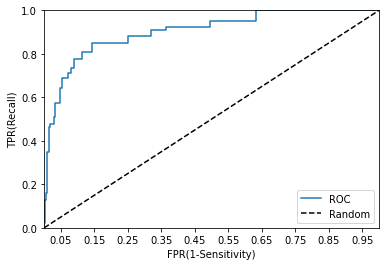

lda의 ROC AUC값: 0.9048


In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


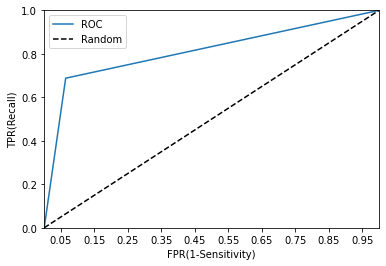

lda의 ROC AUC값: 0.8119


In [52]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

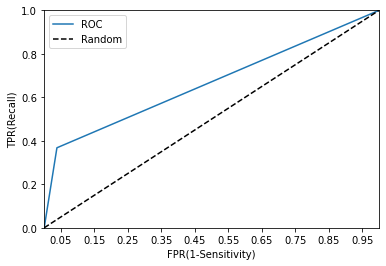

dt ROC AUC값: 0.6650


In [53]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


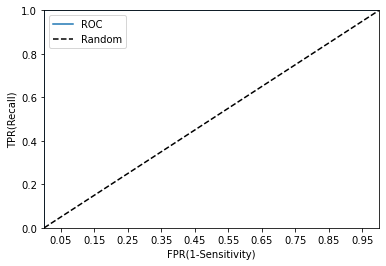

rf ROC AUC값: 1.0000


In [54]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

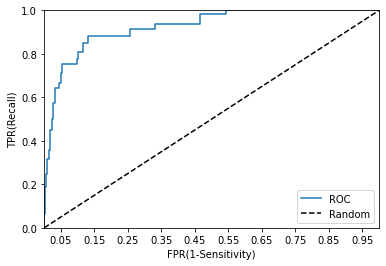

lr ROC AUC값: 0.9248


In [55]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


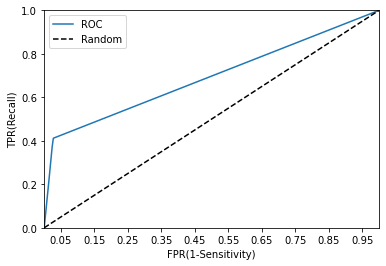

knn ROC AUC값: 0.6925


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [56]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


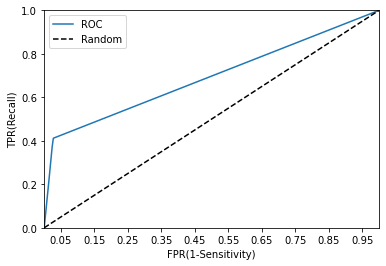

knn ROC AUC값: 0.6925


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [57]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))
